Determine the wave speed for various values of the threshold. Also plot the size of the outbreak.

In [17]:
import spatialfunctions as sf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [18]:
plt.rcParams['font.family'] = 'serif'

# Make plot colors and things to make it easier to be consistent
cmap = plt.cm.get_cmap('Greens')
cdiscrete = cmap(np.linspace(0, 1, 10))
c0 = 'k'
c1 = cdiscrete[-1]

# Figsize consistent
figsize = (3,3)

In [19]:
# Set params
s = 0.99
N = 60
c = 1300
al= 0.001

# Use a range of thresholds
plist = np.arange(100,625,25)
plen = len(plist)

# Set up grid to be large enough given the dispersal kernel
xrexp = 19; dx=16;
xr = np.arange(-2**xrexp,2**xrexp+dx,step=dx)

In [20]:
# Simulate for this many steps
nt = 200

# Save metrics
metrics = np.zeros([3,plen])

for i,pp in enumerate(plist):
    # Simple progress bar
    clear_output(wait=True)
    print(i+1,"/",plen)
    # Get metrics speed[i],period[i],size[i]
    metrics.T[i] = sf.get_outbreak_metrics(pp,c,s,N,al,xr,xrexp,dx,nt)

21 / 21


In [21]:
# Make sure period is N+3 or 0
np.bitwise_or(metrics[1]==N+3,metrics[1]==0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

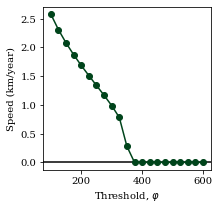

In [22]:
# Plot speeds
plt.figure(figsize=figsize)
plt.plot(plist,metrics[0]/1000,'o-',c=c1)
plt.axhline(0,c=c0,zorder=-99)
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel('Speed (km/year)')
plt.savefig('figures/speed.pdf',bbox_inches='tight')

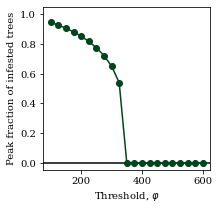

In [23]:
# Plot sizes
plt.figure(figsize=figsize)
plt.plot(plist,metrics[2],'o-',c=c1)
plt.axhline(0,c=c0,zorder=-99)
ydefault = plt.gca().get_ylim()
plt.ylim(ydefault[0],1.05)
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel('Peak fraction of infested trees')
plt.savefig('figures/size.pdf',bbox_inches='tight')